## Bayesian Statistics and Markov Chains

#### *13 November 2019*

#### *DATA 1010*



In [1]:
import Pkg; Pkg.add("SpecialFunctions")

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [276daf66] + SpecialFunctions v0.7.2
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


In [2]:
using Plots, Random, LinearAlgebra, Statistics, Distributions, SymPy, SpecialFunctions
gr(fontfamily = "Palatino", legend=false)
Random.seed!(1234);

Our study statistics so far has reflected an approach to statistics called 'frequentism': data is presumed to come from a fixed, unknown distribution that we seek to draw conclusions about.

Bayesian statistics relaxes this assumption by applying the same treatment to the distribution parameters that we normally apply to unknown entities: we think of them as **random**, described by a probability distribution. 

## Problem 1 - Beyasian Statistics Basics (Coin Example)

(a) Consider a coin that an acquaintance is about to flip to determine who pays for lunch. If you had to posit a single number to represent the heads probability of that coin, what number would you choose?

(b) Perhaps it's overconfident to settle on a single value for the coin's heads probability. Suppose you're willing to represent the heads probability as a random variable with some distribution on $[0,1]$. Given what you know about coins, what distribution would you posit for this random variable?

(a). 0.5

(b). A distribution with most of its mass very close to 1/2, but some elsewhere, and especially at 0 and 1.

![](0.JPG)

---

## Problem 2 - Beta Distribution

Your answer to Problem 1 is called a **prior distribution**. As we will soon see, some distributions make especially nice priors. For the coin flip problem, we'll look at the **Beta** distribution, whose PDF on $[0,1]$ is

$$
p\mapsto \frac{1}{B(\alpha, \beta)} p^{\alpha - 1} (1 - p)^{\beta - 1}, 
$$

where $B(\alpha, \beta)$ is a normalization constant (in other words, $B(\alpha, \beta)$ is whatever value it has to be to ensure the function integrates to 1 over the unit interval. WolframAlpha can [express its value](https://www.wolframalpha.com/input/?i=integrate%28p%5E%28α-1%29*%281-p%29%5E%28β-1%29%2C%28p%2C0%2C1%29%29) in terms of another special function, but you can use `beta(α, β)` to get it from `SpecialFunctions` in Julia). 

Plot the Beta density for a variety of different (integer) choices for $\alpha$ and $\beta$. 

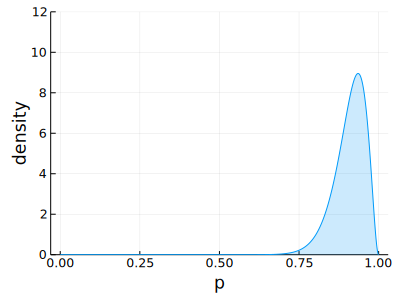

In [3]:
α = 30
β = 3
plot(0:0.001:1, p -> 1/beta(α,β) * p^(α-1) * (1-p)^(β-1), ylims = (0,12), size = (400,300), fillrange = 0 , fillopacity = 0.2, xlabel = "p", ylabel = "density")

What happens when $\alpha$ and $\beta$ are equal and large? What about when they're equal and small? When one is significantly larger than the other?

*Solution*. 
- when values of $\alpha$ and $\beta$ are equal and small (say 1), it results in almost normal with big variance (almost flat) center at 0.5 (uninformed prior in this case)
- when values of $\alpha$ and $\beta$ are equal and big, it results in almost normal with big variance (concentrated at the center) graph center at 0.5
- when alpha is much bigger than beta, the graph shifted to the right

---

## Problem 3 - Problem 1,2 combine

Now let's see what's cool about the Beta distribution. Suppose that our prior for a particular coin is some beta distribution with parameters $\alpha$ and $\beta$. Then we observe $N$ outcomes from flipping the coin, of which $H$ are heads and $T$ are tails. Let's call this vector of results $x$. How should we update the probability distribution representing our belief about the coin's heads probability?

Hint: recall Bayes theorem, which for probability densities says that
$$
\overbrace{f(p|x)}^{\text{posterior}} =
\frac{\overbrace{f(x|p)}^{\text{likelihood}}
\overbrace{f(p)}^{\text{prior}}}
{\underbrace{f(x)}_{\text{marginal}}}.
$$
(Note that these $f$'s are different densities; $f(x)$ is short for $f_X(x)$, $f(p|x)$ for $f_{P|X}(p|x)$, and so on. Using such abbreviations is a common practice for helping keep the notation clean.)

*Solution:*  Punch line is that $\alpha$ and $\beta$ just get incremented by $H$ and $T$, respectively. (**If prior and post have the same distribution, we call it conjugate priors**)

![](2.JPG)

## Problem 4 - Means and CI on posterior distribution

Suppose that a wingnut factory has has produced wingnuts succesfully in the past, to the point that your estimate for the probability that a wingnut from the factory is non-defective is Beta distributed with parameters $\alpha = 80$ and $\beta=3$. Suppose that you get a dozen wingnuts from the factory, and 6 of them turn out to be defective. 

(a) Produce a Bayesian point estimate of the non-defectiveness probability for a wingnut made by that factory, as well as a 95% Bayesian posterior interval (like a confidence interval from frequentist statistics). (Note: you'll have to think of a good way to boil the Bayesian posterior distribution down to a single value, or down to an interval of values.)

(b) Critique this analysis. Why might you be more skeptical of the wingnut factory than the Bayesian calculations would suggest?

*Solution:*

(a).

In [4]:
# Point estimate
B = Beta(86,9)
mean(B)

0.9052631578947369

In [5]:
# 95% CI
(quantile(B,0.025), quantile(B,0.975))

(0.8391779001217937, 0.9552779254780787)

(b).

Manufacturing process are time-dependent, so the i.i.d assumption is called into question.

## Problem 5

We call the Beta distribution a **conjugate prior** for the coin flip problem. While conjugate priors are elegant, they aren't always applicable, since our prior distribution might happen to not be in a conjugate family, or we might not be able to come up with a conjugate family for a given problem. So more general techniques are called for. 



For example, suppose we have data $x$ and would like to obtain the posterior mean for
a parameter $\theta \in [1,2]$. We will assume
$f(\theta) = \frac{1}{\log(4)-1}\log(\theta)$ and that
$f(x|\theta) \sim \operatorname{Normal}(\theta,1)$. 

(a) Plot both of these distributions (the latter for a few values of $\theta$). 

(b) Derive a formula for the posterior mean, and note that it cannot be computed analytically. 

*Solution:*

(a).

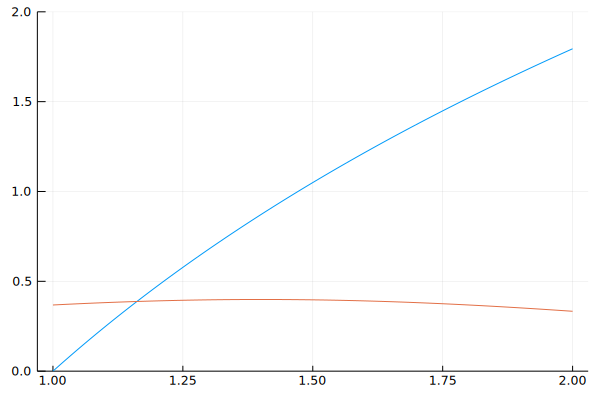

In [7]:
plot(1:0.001:2, θ -> log(θ) / (log(4)-1), ylims = (0,2))
plot!(1:0.001:2, x -> pdf(Normal(1.4,1), x))

(b).

![](3.JPG)

## Problem 6

How could we evaluate the integrals from Problem 5 efficiently and accurately? Explain why this *wouldn't* work if our data were very high dimensional.

*Solution:*

We could use standard numerical integration techniques like the trapezoid rule. It doesn't work in high dimensions because those techniques require densely sampling the function, and that isn't feasible in high dimensions.

![](4.JPG)

## Problem 7 (Note: D should go to A with probability 1)

One way to sample from a distribution on a set $\Omega$ is to put a particle somewhere in $\Omega$ and have it move around $\Omega$ randomly according to some specified rules. Let's start with a  simple example where $\Omega$ has four elements, say $A$, $B$, $C$, and $D$ (even though we could sample from a distribution on $\Omega$ using the inverse CDF trick in this case). 

![](markov-chain.JPG)

(a) Define a matrix whose $(i,j)$th element is equal to the probability of moving to the $j$th node next given that you're currently on the $i$th node (these values are indicated in the yellow labels on the arrows in the figure above). This is called the **transition matrix**. 

*Solution:*

In [8]:
P = [1/2 1/2  0   0
     1/2  0  1/2  0
      0   0  1/2 1/2
      1   0   0   0]

4×4 Array{Float64,2}:
 0.5  0.5  0.0  0.0
 0.5  0.0  0.5  0.0
 0.0  0.0  0.5  0.5
 1.0  0.0  0.0  0.0

(b) Simulate 10,000 runs of 100 steps of this process, each starting from A. Repeat, but starting from B. Based on this experiment, what can you say about distribution of the state at step 100?

*Solution:*

In [13]:
using StatsBase

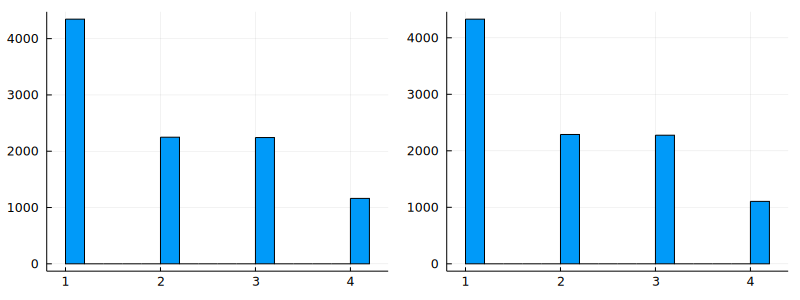

In [15]:
function takestep(i)
    sample(1:4, Weights(P[i,:]))
end

function chain(start, n_steps)
    x = start
    for i in 1:n_steps
        x = takestep(x)
    end
    x
end

# Initial Point doesn't matter
p1 = histogram([chain(1, 100) for _ in 1:10_000])
p2 = histogram([chain(2, 100) for _ in 1:10_000])
plot(p1, p2, size=(800,300))

# [takestep(1) for _ in 1:100]

(c) The distribution you found in the previous part is called the *stationary* distribution of the transition matrix $P$. Show by computation that you end up with the same distribution if you compute the eigenvector of $P'$ whose entries are all positive.

![](5.JPG)

explain for the above graph. $P^2$ means sum of the following possibilities:
1. First go from C to A, then from A to A
2. First go from C to B, then from B to A
2. First go from C to C, then from C to A
2. First go from C to D, then from D to A

![](6.JPG)

(d) Calculate $P^n$ for several values of $n$. What happens as $n -> \infty$?

*Solution:*

In [17]:
P^100

4×4 Array{Float64,2}:
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111

(e). The distribution you found in the previous part is called the *stationary* distribution of the transition matrix $P$. Show by computation that you end up with the same distribution if you compute the eigenvector of $P'$ whose entries are all positive. (**The eigenvector that has all positive entries**)

*Solution:*

In [18]:
eigen(copy(P'))

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
4-element Array{Complex{Float64},1}:
 -0.5000000000000001 + 0.0im                
                0.25 - 0.43301270189221874im
                0.25 + 0.43301270189221874im
  1.0000000000000002 + 0.0im                
eigenvectors:
4×4 Array{Complex{Float64},2}:
 -0.632456+0.0im   -0.5+1.94289e-16im   -0.5-1.94289e-16im  0.8+0.0im
  0.632456+0.0im  -0.25-0.433013im     -0.25+0.433013im     0.4+0.0im
 -0.316228+0.0im    0.5-0.0im            0.5+0.0im          0.4+0.0im
  0.316228+0.0im   0.25+0.433013im      0.25-0.433013im     0.2+0.0im

---

## Summary

![](7.JPG)

![](8.JPG)

---

## Problem 8 (Challenge problem)

Consider the following example as a case in which the Bayesian approach is more useful than the frequentist approach.

(a) Suppose that we know the distribution of our underlying sample space. We have to take an action $a$, given the data $\mathbf{x}$. This action may be a classification or a regression, in which case we incur a loss $L(y,a(\mathbf{x})) = \mathbb{I}(y \neq a(\mathbf{x}))$ and squared loss $L(y,a(\mathbf{x})) = (y - a(\mathbf{x}))^2$.

Our goal is to devise a decision procedure from our data to the action space $\delta: X \mapsto A$ that optimally specifies the action for each possible option. How should we formulate this $\delta$ as a function of $x$?

(b) Suppose that we ascribe a distribution $f_\Theta(\theta)$ to $\theta$, and we updated our posterior distribution as $f(\theta| \mathbf{x})$. As we optimize for the decision strategy $\delta$, we need to estimate how the $\delta$ will on average behave since each time the sample from the distribution is different. Write the distribution for our data $f_{X|\Theta}(x|\theta)$. Formalize this expectation--we call this expected loss $\textbf{risk}$.

(c) The trouble is, in a frequentist setting, we do not assume knowledge of the parameters controlling the underlying distribution. As a result, we have no way of defining $\delta: X\to A$ according to the distribution because the distribution $X$ is not defined. Explain why this would be a problem for estimating the expectation above.